## <center> Go to piazza and open today's lecture notes in the hub! </center>
## <center> https://piazza.com/class/jzioyk40mhs6r2 </center>
## <center> Let's go to tophat for attendance! </center>
## <center> https://app.tophat.com/e/245218 </center>

## Mud card

- **How can we do non-linear transformations (time series data and seasonal variations)?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame()
# this is our original feature - day of the year
df['day of year'] = np.random.randint(0,365,size=1000)

# I add a new column to the database which is called 'sin transformed day'
df['sin-transformed day'] = np.sin(df['day of year'] / 365e0 * np.pi)

print(df.head())

   day of year  sin-transformed day
0          166             0.989932
1          306             0.486273
2          205             0.981306
3          172             0.995919
4          331             0.288482


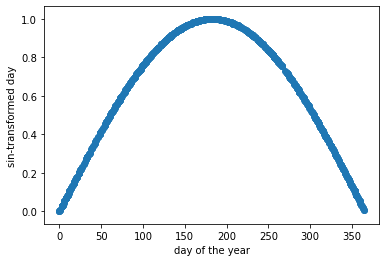

In [2]:
plt.scatter(df['day of year'],df['sin-transformed day'])
plt.xlabel('day of the year')
plt.ylabel('sin-transformed day')
plt.show()

## Evaluation metrics in supervised ML, part 1, classification
By the end of this lecture, you will be able to
- Describe the terms in the confusion matrix
- Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)
- Choose a metric most appropriate for your problem


## Where are we in the supervised ML pipeline?
- data is in a pandas data frame
- features are preprocessed, visualized and understood
- classification labels are preprocessed if necessary
- missing values have been dealt with
- features were selected or engineered if necessary

## What's next?
- decide what metric we will use to evaluate the supervised ML model 
   - this is necessary even before we train the model
   - we need to know what single number metric we will use to compare models and to select the best one
- sklearn classifiers have two methods to return predictions
   - .predict_proba which returns the probability that the point belongs to each class with shape (n_samples, n_classes)
   - .predict which returns the predicted class for each point with shape (n_samples)

### .predict_proba vs. .predict

`y_true = [1 0 1 1 0] # the true labels`

`pred_probs = 
[[0.02796171 0.97203829]
 [0.89682444 0.10317556]
 [0.50104129 0.49895871]
 [0.13713222 0.86286778]
 [0.95707434 0.04292566]] # predicted probabilities show the model's confidence`
 
 `y_pred = [1 0 0 1 0] # predicted class`
 - pred_probs
    - first column is the probability that the point belongs to class 0
    - second column is the probability that the point belings to class 1
    - the rows sum to 1
 - y_pred
    - 0 if class 0 probability is equal or larger than 50% (or equivalently if class 1 probability is less than 50%)
    - 1 if class 0 probability is less than 50% (or equivalently of class 1 probability is equal or larger than 50%)

### How to transform predicted probabilities to predicted class?

In [8]:
y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
# pred_probs_class1 is the second column of pred_probs
pred_probs_class1 = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])
p_crit =  0.4

# If predicted probability is < p_crit (by default 0.5), predicted class is 0, otherwise it is 1.
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 < p_crit] = 0
y_pred[pred_probs_class1 >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 1 1 1 0 0 1]


Today we focus on evaluation metrics applicable to predicted classes!

We work with y_true and y_pred arrays.

Next week, we will work with metrics applicable to pred_probs and regression problems.

## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe the terms in the confusion matrix**
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## The confusion matrix

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`

Let's count how many points we have in four categories:

- true label is 0, predicted label is 0 - **True Negatives**
- true label is 1, predicted label is 1 - **True Positives**
- true label is 0, predicted label is 1 - **False Positive**
- true label is 1, predicted label is 0 - **False Negative**

Generally, the confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

## Back to our example:

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN): 4</b></td>
        <td><b>False Positive (FP): 1</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN): 2</b></td>
        <td><b>True Positive (TP): 3</b></td>
    </tr>
</table>


## In sklearn

In [3]:
from sklearn.metrics import confusion_matrix

y_true = [0,0,1,0,1,1,0,1,0,1]
y_pred = [0,1,1,0,0,1,0,0,0,1]
print(confusion_matrix(y_true,y_pred))

[[4 1]
 [2 3]]


In [10]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


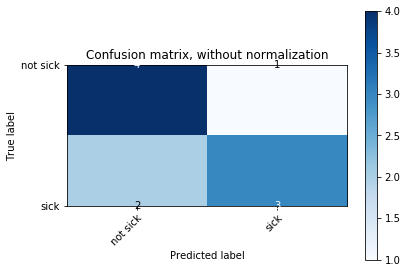

In [11]:
plot_confusion_matrix(y_true,y_pred,classes=['not sick','sick'])
plt.show()

## Exercise 1

Visualize the confusion matrix and calculate what fraction of the data points are correctly classified in the example below.

[[5 2 0]
 [1 3 1]
 [1 1 2]]


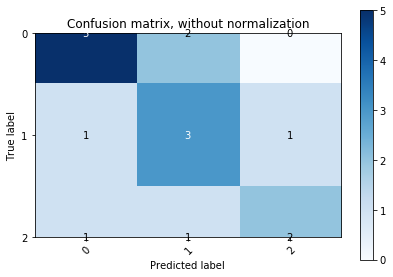

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_true = np.array([0,0,2,1,1,0,2,2,2,0,1,1,0,0,0,1])
y_pred = np.array([0,1,0,1,0,0,2,2,1,0,1,1,0,0,1,2])
print(confusion_matrix(y_true,y_pred))
plot_confusion_matrix(y_true,y_pred,classes=['0','1','2'])
plt.show()

## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- **Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)**
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## Metrics derived from $C$
$C$ contains $n_{classes}^2$ elements but we need a single number metric to easily compare various models.

Some single number metrics derived from $C$:
- accuracy: fraction of data points correctly classified
   - $a = \sum_i C_{i,i} / \sum C$ = (TP + TN) / (TP + TN + FP + FN)
- recall: what fraction of the condition positive samples are true positives?
   - it measures the ability of the classifier to identify all positive samples
   - in binary classification: R = TP / (TP + FN)
- precision: what fraction of the predicted positive points are true positives?
   - it measures the ability of the classifier to not predict a negative sample to be positive
   - in binary classification: P = TP / (TP + FP)

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

A = (TP + TN) / (TP + TN + FP + FN) 

R = TP / (TP + FN) = TP / CP

P = TP / (TP + FP) = TP / PP

### The f_beta score
Weighted harmonic mean of P and R:
### <center> $f_{\beta} = (1 + \beta^2) \frac{P R}{\beta^2 P + R}$ </center>

If $\beta = 1$, we have the f1 score:
### <center> $f_{1} = 2 \frac{P R}{P + R}$ </center>

If $\beta < 1$, more weight to precision.

If $\beta > 1$, more weight to recall.



### The scores are a function of p_crit

In [20]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
y_pred_proba = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])

p_crit = 0.5

y_pred = np.zeros(len(y_pred_proba),dtype=int)
y_pred[y_pred_proba < p_crit] = 0
y_pred[y_pred_proba >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print('accuracy',accuracy_score(y_true,y_pred))
print('recall',recall_score(y_true,y_pred))
print('precision',precision_score(y_true,y_pred))
print('f1',fbeta_score(y_true,y_pred,1))

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 0 1 0 0 0 1]
accuracy 0.7
recall 0.6
precision 0.75
f1 0.6666666666666665


## Exercise 2
Given the true and predicted labels, what are the accuracy, recall, precision, and f1 scores? 

Do not use sklearn to answer the question! First construct the confusion matrix and then calculate the scores by hand!

In [35]:
y_true = [0,0,0,1,1,1,0,0]
y_pred = [0,1,0,1,1,0,0,0]
TN = sum([y_true[i] == y_pred[i] == 0 for i in range(len(y_true))])
TP = sum([y_true[i] == y_pred[i] == 1 for i in range(len(y_true))])
FN = sum([y_true[i] != y_pred[i] == 0 for i in range(len(y_true))])
FP = sum([y_true[i] != y_pred[i] == 1 for i in range(len(y_true))])
acc = (TN+TP)/(len(y_true))
R = TP / (TP + FN)
P = TP / (TP + FP)
f1 = 2*R*P/(R+P)
acc, R, P, f1

(0.75, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666)

## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- **Choose a metric most appropriate for your problem**


## How should you choose a metric?

- What are the terms in the confusion matrix that you most (or least) care about?
    - In an imbalanced dataset, TNs are large so you should use a metric that doesn't include TN
    - no accuracy
    - f1 score is usually preferred if your dataset is imbalanced
- Will we act (intervene/apply treatment) on the model's prediction?
    - Is it cheap to act? (e.g., mass email)
       - we want to capture the largest fraction of the condition positive samples even if FPs will be large as a result
       - recall or fbeta with beta > 1 (f1.5 is often used)
    - Is it expensive to act? Do we have limited resources? Or treatment/action is costly?
       - we want to make sure that the resources are allocated the best way possible
       - want to make sure that a large fraction of the predicted positives are  true positives
       - precision or fbeta with beta < 1 (f0.5 is often used)

By now you can
- Describe the terms in the confusion matrix
- Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)
- Choose a metric most appropriate for your problem
